In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import itemfreq
%matplotlib inline
import warnings
import re
from datetime import datetime
import math

In [3]:
house_price = pd.read_csv('/Users/uthsaharamesh/Box Sync/UT Dallas (uxg180002@utdallas.edu)/Courses/First Sem/Business Analystics with R/Project/kc_house_data.csv')

In [4]:
house_price.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [5]:
house_price.describe().transpose()

count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

In [6]:
house_price.shape

(21613, 21)

In [7]:
house_price.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
house_price.head(5)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [9]:
house_price.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
house_price["date"] = pd.to_datetime(house_price["date"])

In [11]:
house_price.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [12]:
house_price.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.605567  0.477600   0.685342     0.876597  0.183512   
sqft_basement -0.005151  0.323816  0.303093   0.283770     0.435043  0.015286   
yr_built       0.021380  0.054012  0.154178   0.506019     0.318049  0.053080   
yr_renovated  -0.016907  0.126434  0.018841   0.050739     0.055363  0.007644   
zipcode       -0.008224 -0.053203 -0.152668  -0.203866    -0.199430 -0.129574   
lat           -0.001891  0.307003 -0.008931   0.024573     0.052529 -0.085683   
long           0.020799  0.021626  0.129473   0.223042     0.240223  0.229521   
sqft_living15 -0.002901  0.585379  0.391638   0.568634     0.756420  0.144608   
sqft_lot15    -0.138798  0.082447  0.029244   0.087175     0.183286  0.718557   

                 floors  waterfront      view  condition     grade  \
id             0.018525   -0.002721  0.011592  -0.023783  0.008130   
price          0.256794    0.266369  0.397293   0.036362  0.667434   
bedrooms       0.175429   -0.006582  0.079532   0.028472  0.356967   
bathrooms      0.500653    0.063744  0.187737  -0.124982  0.664983   
sqft_living    0.353949    0.103818  0.284611  -0.058753  0.762704   
sqft_lot      -0.005201    0.021604  0.074710  -0.008958  0.113621   
floors         1.000000    0.023698  0.029444  -0.263768  0.458183   
waterfront     0.023698    1.000000  0.401857   0.016653  0.082775   
view           0.029444    0.401857  1.000000   0.045990  0.251321   
condition     -0.263768    0.016653  0.045990   1.000000 -0.144674   
grade          0.458183    0.082775  0.251321  -0.144674  1.000000   
sqft_above     0.523885    0.072075  0.167649  -0.158214  0.755923   
sqft_basement -0.245705    0.080588  0.276947   0.174105  0.168392   
yr_built       0.489319   -0.026161 -0.053440  -0.361417  0.446963   
yr_renovated   0.006338    0.092885  0.103917  -0.060618  0.014414   
zipcode       -0.059121    0.030285  0.084827   0.003026 -0.184862   
lat            0.049614   -0.014274  0.006157  -0.014941  0.114084   
long           0.125419   -0.041910 -0.078400  -0.106500  0.198372   
sqft_living15  0.279885    0.086463  0.280439  -0.092824  0.713202   
sqft_lot15    -0.011269    0.030703  0.072575  -0.003406  0.119248   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010842      -0.005151  0.021380     -0.016907 -0.008224   
price            0.605567       0.323816  0.054012      0.126434 -0.053203   
bedrooms         0.477600       0.303093  0.154178      0.018841 -0.152668   
bathrooms        0.685342       0.283770  0.506019      0.050739 -0.203866   
sqft_living      0.876597       0.435043  0.318049      0.055363 -0.199430   
sqft_lot         0.183512       0.015286  0.053080      0.007644 -0.129574   
floors           0.523885      -0.245705  0.489319      0.006338 -0.059121   
waterfront       0.072075       0.080588 -0.026161      0.092885  0.030285   
view             0.167649       0.276947 -0.053440      0.103917  0.084827   
condition       -0.158214       0.174105 -0.361417     -0.060618  0.

In [13]:
house_price = house_price.drop(['waterfront', 'view'], axis = 1)

In [14]:
col=house_price.columns

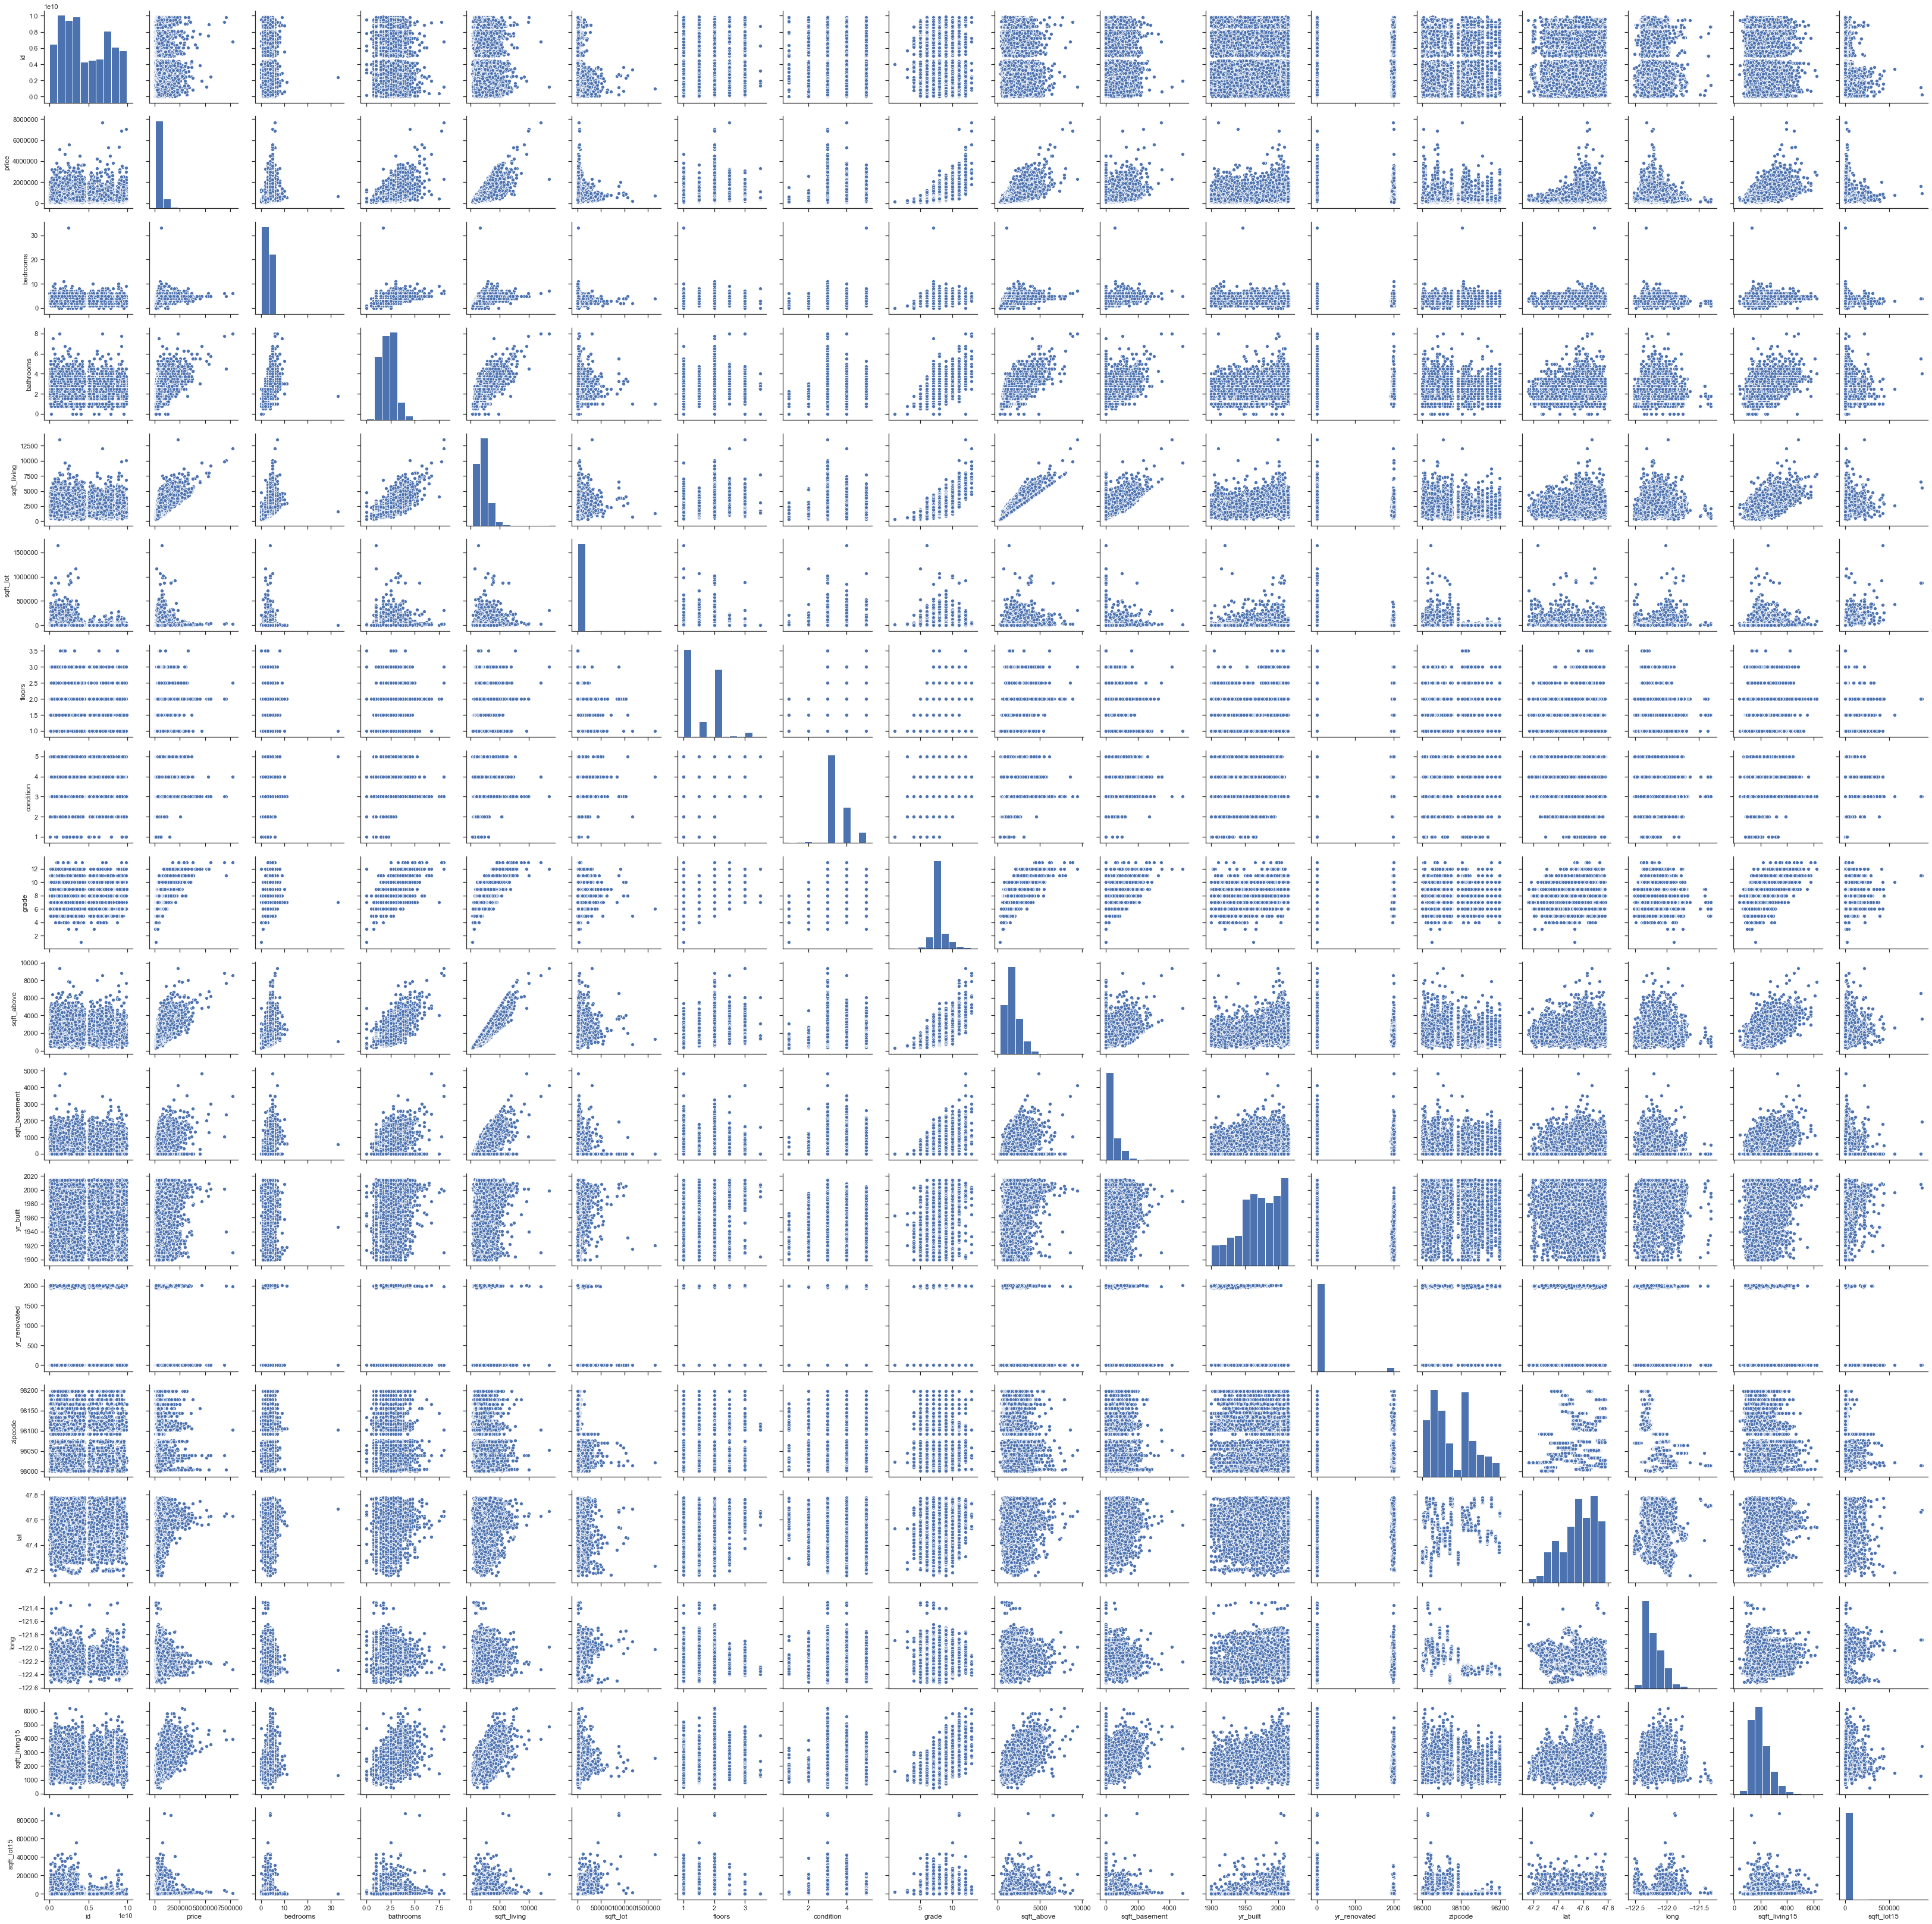

In [16]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(house_price[col], height=2.5)
plt.show()

<Figure size 1440x792 with 0 Axes>

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text xticklabel objects>)

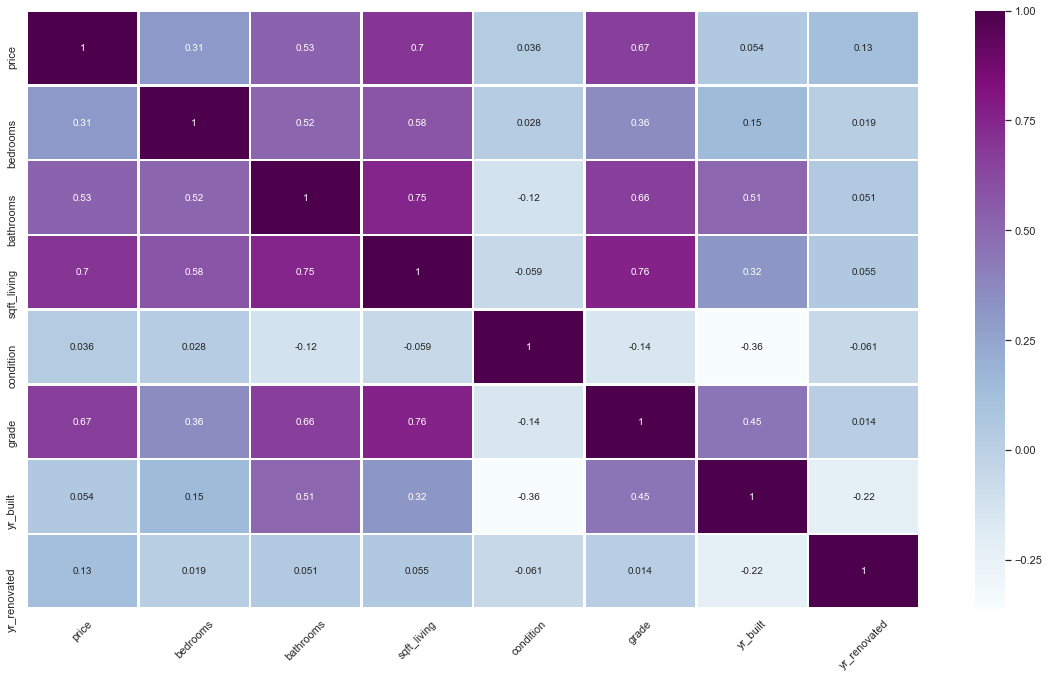

In [30]:
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'condition', 'grade', 'yr_built', 'yr_renovated']
plt.figure(figsize=(20,11))
sns.heatmap(house_price[cols].corr(),cmap = 'BuPu', annot=True, linewidths=1.5)
plt.xticks(rotation=45)
plt.show()



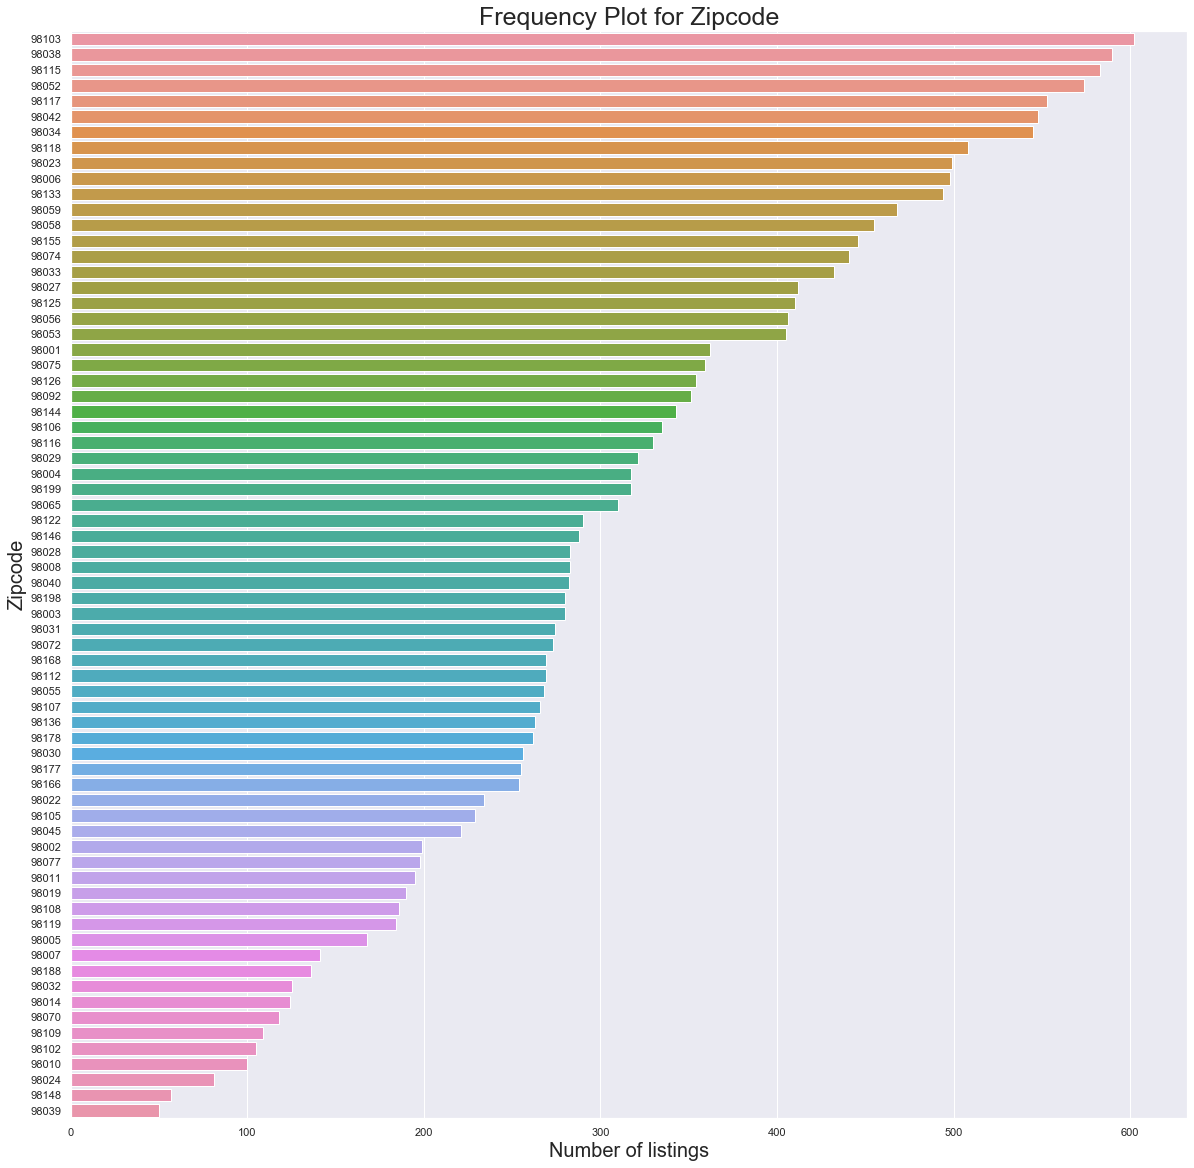

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
Name: zipcode, dtype: int64

In [15]:
import matplotlib.pylab as plt 
fig1 = plt.figure(figsize=(20,20))
sns.set(style='darkgrid')
sns.countplot(y=house_price['zipcode'], data = house_price, order = house_price['zipcode'].value_counts().index)
plt.xlabel('Number of listings', size=20, fontsize=20)
plt.ylabel('Zipcode', size=15, fontsize=20)
plt.title('Frequency Plot for Zipcode', size=25)
plt.show()
house_price['zipcode'].value_counts().head(10)

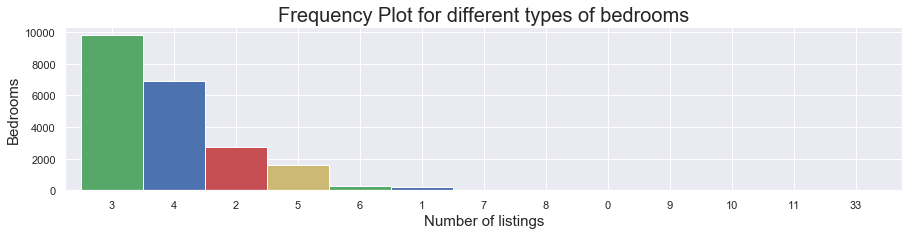

In [16]:
bedroom = house_price['bedrooms'].value_counts()
bedroom.plot.bar(figsize=(15, 3), width=1, color = ["g","b","r","y"], rot=0)
plt.ylabel('Bedrooms', fontsize=15)
plt.xlabel('Number of listings', fontsize=15)
plt.title('Frequency Plot for different types of bedrooms', size=20)
plt.show()

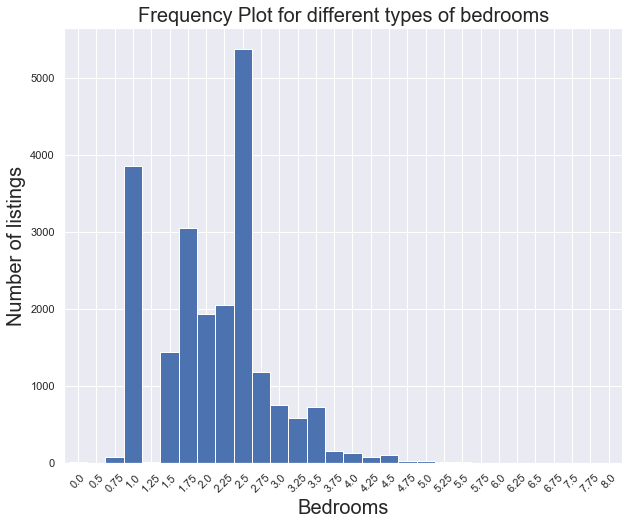

In [17]:
bathroom = house_price['bathrooms'].value_counts().sort_index()
bathroom.plot.bar(figsize=(10, 8), width=1, rot=45)
plt.ylabel('Number of listings', fontsize=20)
plt.xlabel('Bedrooms', fontsize=20)
plt.title('Frequency Plot for different types of bedrooms', size=20)
plt.show()

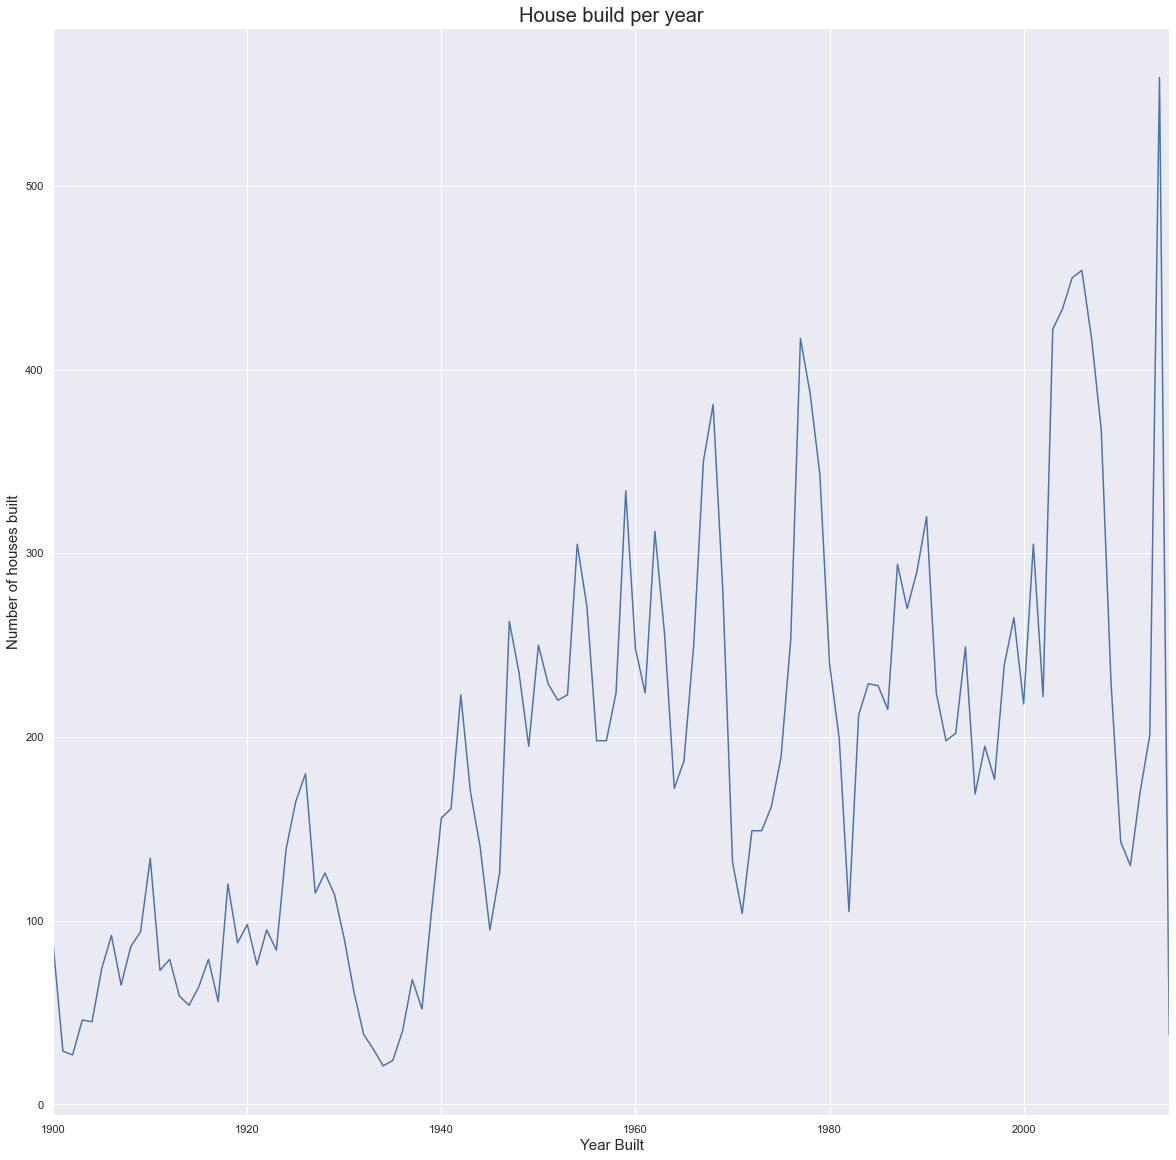

In [18]:
house_build_per_year = house_price.groupby('yr_built')['id'].count()
plt.figure(figsize=(20,20))
house_build_per_year.plot(kind='line', color='b')
plt.xlabel('Year Built', size=15, fontsize=15)
plt.ylabel('Number of houses built', size=15)
plt.title('House build per year', size=20)
plt.show()

In [19]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

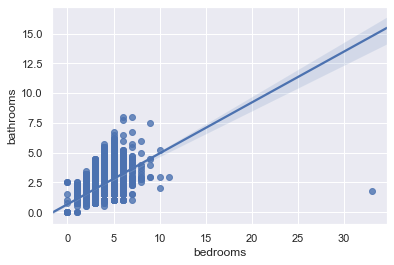

In [20]:
sns.regplot(x='bedrooms', y='bathrooms', data=house_price)
plt.show()

In [21]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import mglearn

import warnings
warnings.filterwarnings('ignore')

/Users/uthsaharamesh/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/uthsaharamesh/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [22]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(13)
memory usage: 3.1 MB


In [32]:
dummies=pd.get_dummies(house_price[['bedrooms', 'bathrooms', 'sqft_living', 'condition','yr_built']])
dummies

bedrooms  bathrooms  sqft_living  condition  yr_built
0             3       1.00         1180          3      1955
1             3       2.25         2570          3      1951
2             2       1.00          770          3      1933
3             4       3.00         1960          5      1965
4             3       2.00         1680          3      1987
5             4       4.50         5420          3      2001
6             3       2.25         1715          3      1995
7             3       1.50         1060          3      1963
8             3       1.00         1780          3      1960
9             3       2.50         1890          3      2003
10            3       2.50         3560          3      1965
11            2       1.00         1160          4      1942
12            3       1.00         1430          4      1927
13            3       1.75         1370          4      1977
14            5       2.00         1810          3      1900
15            4       3.00         2950          3      1979
16            3       2.00         1890          3      1994
17            4       1.00         1600          4      1916
18            2       1.00         1200          4      1921
19            3       1.00         1250          4      1969
20            4       1.75         1620          4      1947
21            3       2.75         3050          3      1968
22            5       2.50         2270          3      1995
23            2       1.50         1070          3      1985
24            3       2.25         2450          4      1985
25            3       2.00         1710          5      1941
26            3       1.75         2450          3      1915
27            3       1.00         1400          5      1909
28            3       1.75         1520          3      1948
29            4       2.50         2570          3      2005
...         ...        ...          ...        ...       ...
21583         2       1.00          710          4      1943
21584         3       2.50         1260          3      2007
21585         3       2.50         1870          3      2009
21586         2       2.50         1430          3      2009
21587         3       2.50         1520          3      2006
21588         2       1.50         1210          3      2007
21589         3       2.50         2540          3      2010
21590         4       3.50         4910          3      2007
21591         4       2.75         2770          3      2014
21592         3       2.25         1190          3      2008
21593         5       3.75         4170          3      2006
21594         4       2.75         2500          3      2008
21595         2       2.25         1530          3      2006
21596         5       2.75         3600          3      2014
21597         4       3.25         3410          3      2007
21598         4       2.50         3118          3      2014
21599         4       3.00         3990          3      2003
21600         5       3.75         4470          3      2008
21601         3       2.50         1425          3      2008
21602         3       1.75         1500          3      2014
21603         3       2.50         2270          3      2003
21604         3       2.00         1490          3      2014
21605         4       2.50         2520          3      2014
21606         4       3.50         3510          3      2009
21607         3       2.50         1310          3      2008
21608         3       2.50         1530          3      2009
21609         4       2.50         2310          3      2014
21610         2       0.75         1020          3      2009
21611         3       2.50         1600          3      2004
21612         2       0.75         1020          3      2008

[21613 rows x 5 columns]

In [35]:
house_price_lnreg = pd.concat([house_price,dummies],axis=1)
house_price_lnreg.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'bedrooms', 'bathrooms', 'sqft_living',
       'condition', 'yr_built'],
      dtype='object')

# Linear Regression

In [38]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X = house_price[['bedrooms', 'bathrooms', 'sqft_living', 'condition','yr_built']] 
y = house_price['price']

# Devide the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

lr = LinearRegression(normalize=True).fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

print('R-Squared Error:', r2_score(y_test,y_pred))

lr.coef_: [-65358.30412877  86455.18824778    293.78652513  12847.0093796
  -3014.90697885]
lr.intercept_: 5865226.9151347475
Training set score: 0.55
Test set score: 0.56
R-Squared Error: 0.5575344565476835


In [41]:
import statsmodels.api as sm
X_train_stats = sm.add_constant(X_train)
model=sm.OLS(y_train, X_train_stats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     3666.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:43:05   Log-Likelihood:            -2.0929e+05
No. Observations:               15129   AIC:                         4.186e+05
Df Residuals:                   15123   BIC:                         4.186e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.865e+06   1.69e+05     34.647      0.000    5.53e+06     6.2e+06
bedrooms    -6.536e+04   2643.594    -24.723      0.000   -7.05e+04   -6.02e+04
bathrooms    8.646e+04   4459.424     19.387      0.000    7.77e+04    9.52e+04
sqft_living   293.7865      3.540     82.988      0.000     286.847     300.726
condition    1.285e+04   3335.484      3.852      0.000    6309.058    1.94e+04
yr_built    -3014.9070     85.015    -35.463      0.000   -3181.547   -2848.267
==============================================================================
Omnibus:                     9860.770   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           341110.525
Skew:                           2.627   Prob(JB):                         0.00
Kurtosis:                      25.661   Cond. No.                     2.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
X_test_stats=sm.add_constant(X_test)
y_test = model.predict(X_test_stats)

In [43]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.914379692427012e-08
Mean Squared Error: 6.366376146821181e-15
Root Mean Squared Error: 7.978957417370505e-08


In [47]:
lr.coef_.T

array([-65358.30412877,  86455.18824778,    293.78652513,  12847.0093796 ,
        -3014.90697885])

In [48]:
lr.score(X_train, y_train)
lr.score(X_test, y_test)

0.5479420942140993

1.0

# Decision Tree

In [96]:
def plot_learning_curve(estimator, title, X, y, ylim, cv,
                        n_jobs, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.figure(figsize=(10,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Mean Absolute Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_mean=-train_scores_mean
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_mean=-test_scores_mean
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(True)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
opt_tree = DecisionTreeRegressor(random_state = 0)
param_DT = {"max_depth": range(1,20),
           "min_samples_split": range(2,10,1)}

grid_tree = GridSearchCV(opt_tree,param_DT,cv=10)
grid_tree.fit(X_train,y_train)
print(grid_tree.best_params_)
print(grid_tree.score(X_train,y_train))
print(grid_tree.score(X_test,y_test))

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 20),
                         'min_samples_split': range(2, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None

{'max_depth': 7, 'min_samples_split': 8}
0.6398703602715475
0.7758803330935503


In [98]:
print("Best Parameters Achieved ", grid_tree.best_params_)
print("R Square Achieved:", grid_tree.score(X_train,y_train))

Best Parameters Achieved  {'max_depth': 7, 'min_samples_split': 8}
R Square Achieved: 0.6398703602715475


<module 'matplotlib.pyplot' from '/Users/uthsaharamesh/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

<Figure size 432x288 with 0 Axes>

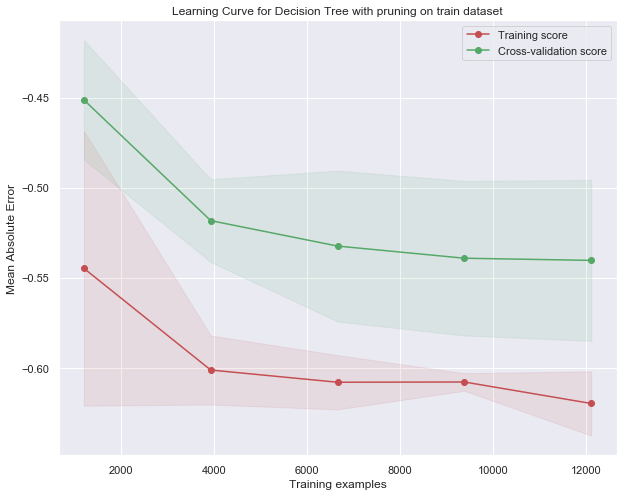

In [99]:
from sklearn.model_selection import ShuffleSplit,learning_curve,GridSearchCV,RandomizedSearchCV
title = r"Learning Curve for Decision Tree with pruning on train dataset"
estimator = grid_tree
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=80)
%matplotlib inline
plot_learning_curve(estimator,title, X_train, y_train, None, cv=cv, n_jobs=4)

In [ ]:
y_pred=grid_tree.predict(X_test)

In [100]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.914379692427012e-08
Mean Squared Error: 6.366376146821181e-15
Root Mean Squared Error: 7.978957417370505e-08


In [101]:
y_train.mean()

540844.4193932184

# Random Forest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor

random_regr = RandomForestRegressor(max_depth=8,random_state=0,n_estimators=100)
random_regr.fit(X_train, y_train)
print(random_regr.score(X_train,y_train))
print(random_regr.score(X_test,y_test))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

0.6922701859413218
0.8659783183018969


In [103]:
print("R Square Achieved:", random_regr.score(X_train,y_train))

R Square Achieved: 0.6922701859413218


<module 'matplotlib.pyplot' from '/Users/uthsaharamesh/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

<Figure size 432x288 with 0 Axes>

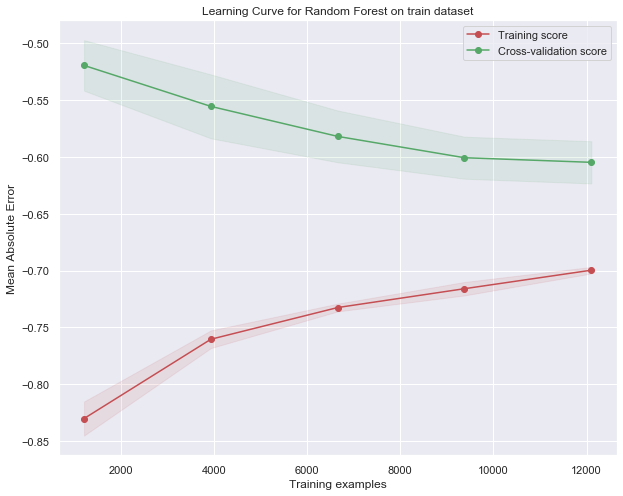

In [104]:
title = r"Learning Curve for Random Forest on train dataset"
estimator = random_regr
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=80)
%matplotlib inline
plot_learning_curve(estimator,title, X_train, y_train, None, cv=cv, n_jobs=4)

In [105]:
y_pred=random_regr.predict(X_test)

In [106]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 66221.68957628126
Mean Squared Error: 9808362904.41655
Root Mean Squared Error: 99037.179404588
